# House Price Prediction

## Importing the libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [14]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Dependent Variable

In [19]:
y = df.iloc[:,:1]
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


### Independent Vairables

In [21]:
x = df.iloc[:,5:10].join(df.iloc[:,-2:])
x

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [22]:
df["furnishingstatus"].nunique()

3

### Encoding the Independent Variable

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in x.columns:
    df[i] = le.fit_transform(df[i])

In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc = ['price', 'area']
df[sc] = scaler.fit_transform(df[sc])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,-1.605149,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-1.614327,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,-1.614327,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [28]:
df.dtypes

price               float64
area                float64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus      int64
dtype: object

### Correlation Analysis

In [30]:
corr_matrix = df.corr()

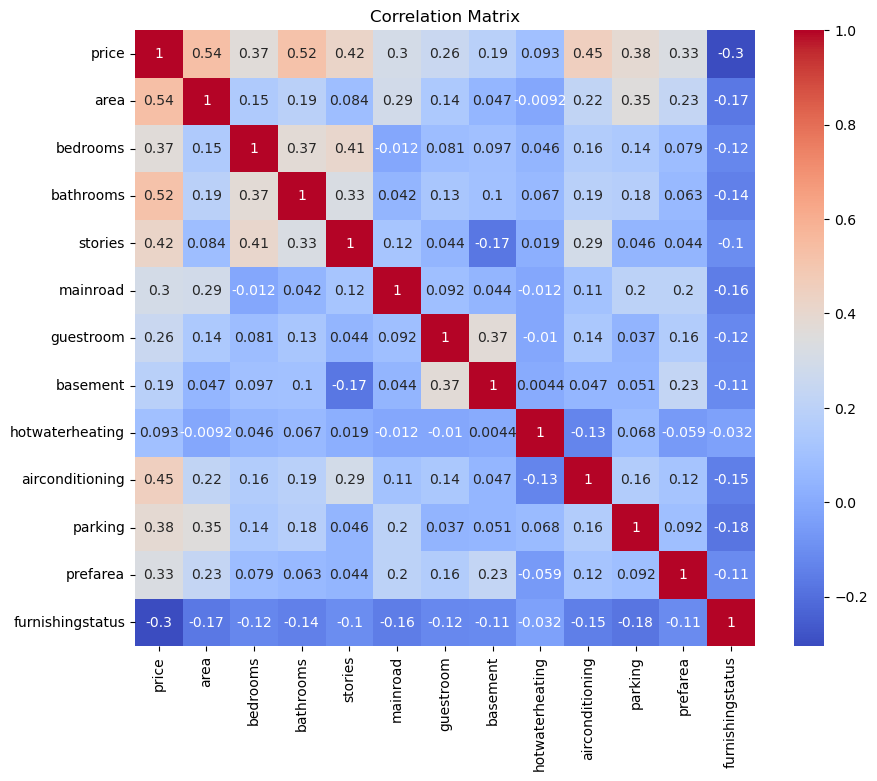

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Distribution

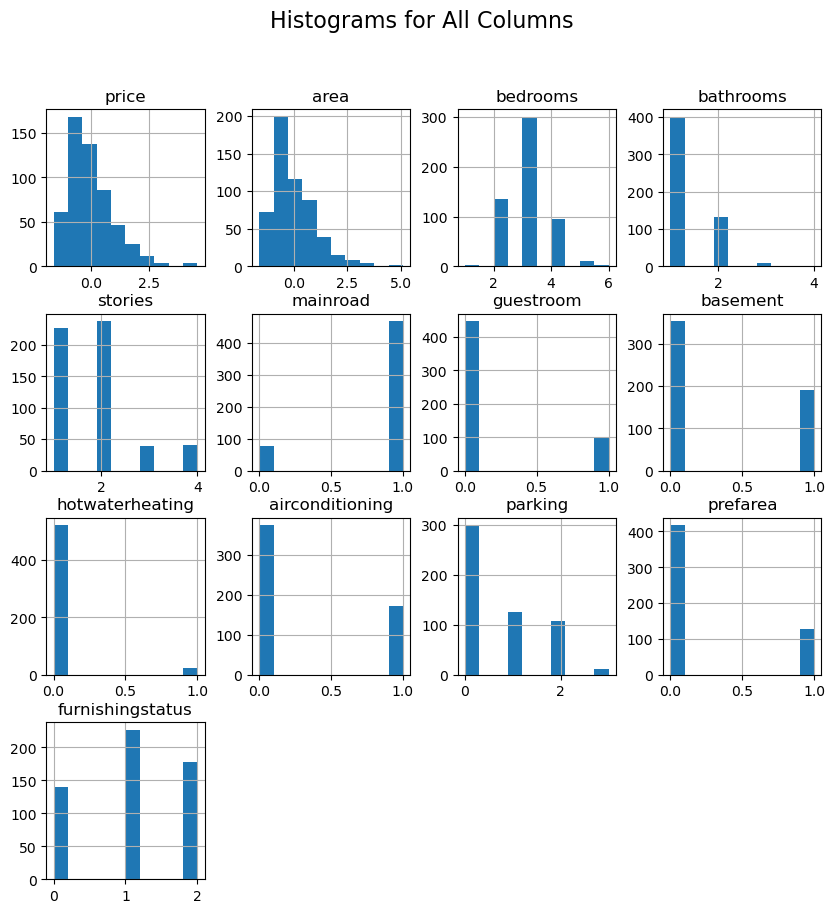

In [33]:
df.hist(figsize=(10, 10), bins=10)
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.show()

## Splitting the dataset into the Training set and Test set

In [35]:
X = df.drop('price', axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [38]:
lr_y_pred = lr_model.predict(X_test)

In [39]:
from sklearn.metrics import r2_score
lr_accuracy = r2_score(y_test, lr_y_pred)

In [40]:
lr_accuracy

0.6494754192267792

### Optimizing Accuracy

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#GridSearchCV → Finds the best hyperparameters using cross-validation.
#Ridge, Lasso → Regularized linear regression models.
#mean_squared_error, r2_score → Metrics to evaluate model performance.

In [43]:
# Define hyperparameter grid for Ridge and Lasso Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  

#alpha controls regularization strength (higher alpha → more penalty).

### Evaluate Ridge on Train Data (Ridge Regression with Grid Search)

In [45]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)  # 5-fold Cross Validation
ridge_cv.fit(X_train, y_train) 

print("Best Alpha for Ridge:", ridge_cv.best_params_)
print("Best R2 Score for Ridge:", ridge_cv.best_score_)

Best Alpha for Ridge: {'alpha': 10}
Best R2 Score for Ridge: 0.6482743491367342


### Evaluate Ridge on Test Data

In [47]:
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print("R2 Score on Test Data (Ridge):", ridge_r2)

R2 Score on Test Data (Ridge): 0.6439770573229401


### Evaluate Lasso on Train Data (Lasso Regression with Grid Search)

In [49]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)  
lasso_cv.fit(X_train, y_train)

print("Best Alpha for Lasso:", lasso_cv.best_params_)
print("Best R2 Score for Lasso:", lasso_cv.best_score_)

Best Alpha for Lasso: {'alpha': 0.01}
Best R2 Score for Lasso: 0.642066525685232


### Evaluate Lasso on Test Data

In [51]:
y_pred_lasso = lasso_cv.best_estimator_.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print("R2 Score on Test Data (Lasso):", lasso_r2)

R2 Score on Test Data (Lasso): 0.6329691458312565
